In [1]:
#importing modules
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as pt
import matplotlib.image as img
from keras.utils import np_utils


Using TensorFlow backend.


In [76]:
##importing data
train_path='train.csv'
test_path='test.csv'
train_raw_data=pd.read_csv(train_path)
test_raw_data=pd.read_csv(test_path)

In [77]:
#visualing data  
train_raw_data.head()
## train data in (m,#pixels_value) #first column is label
test_raw_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
##converting csv data to numpy array
(m_train,n_train)=train_raw_data.shape
(m_test,n_test)=test_raw_data.shape
n_train=n_train-1  ###substracting the label column
print(m_train,n_train,m_test,n_test)
Y_labels=np.zeros((m_train,1))
train_data=np.zeros((m_train,n_train))
test_data=np.zeros((m_test,n_test))
i=0 # starting index for columns of train_raw_data
for col in train_raw_data.columns:
    if col=='label':
        Y_labels[:,0]=train_raw_data[col]
        
    else:
        train_data[:,i]=train_raw_data[col]
        i=i+1
j=0
for col in test_raw_data.columns:
    test_data[:,j]=test_raw_data[col]
    j=j+1    

y_train = np_utils.to_categorical(Y_labels, 10)

42000 784 28000 784


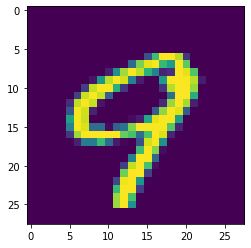

In [79]:
##ploting data
a=train_data[100].reshape(28,28)
pt.imshow(a)

In [80]:
#normalizing data
train_data=train_data/255.0   ##train_data.max()==255
test_data=test_data/255.0


In [81]:
##traning with tensorflow
model=tf.keras.models.Sequential([
tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
tf.keras.layers.Dense(units=100,activation=tf.nn.relu),
tf.keras.layers.Dense(units=100,activation=tf.nn.relu),
#tf.keras.layers.Dense(units=50,activation=tf.nn.relu),
#tf.keras.layers.Dense(units=50,activation=tf.nn.relu),
tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

#model.compile(optimizer=tf.optimizers.Adam(),loss='MeanSquaredLogarithmicError',metrics=['accuracy'])
#model.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy')
model.compile(optimizer=tf.optimizers.RMSprop(),loss='mean_squared_error',metrics=['accuracy'])
model.fit(train_data,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0132 - accuracy: 0.9119
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0065 - accuracy: 0.9580
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0049 - accuracy: 0.9690
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0040 - accuracy: 0.9749
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0034 - accuracy: 0.9785
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0030 - accuracy: 0.9814
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 0.9829
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.9854
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 0.9865
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.002

In [82]:
prediction=model.predict(test_data)
prediction.shape

(28000, 10)

In [83]:
pre=np.argmax(prediction,axis=1)
print(Y_labels,pre)


[[1.]
 [0.]
 [1.]
 ...
 [7.]
 [6.]
 [9.]] [2 0 9 ... 3 9 2]


In [84]:
id=np.linspace(1,m_test,m_test).astype(int)

data={'ImageId':id,
    'label':pre}
s=pd.DataFrame(data=data)
s.to_csv('check.csv',index=False)

In [85]:
print(id.shape)
print(pre.shape)

(28000,)
(28000,)


In [107]:
##using CNN

##reshaping into image
X_train=train_data.reshape(m_train,28,28,1)
X_test=test_data.reshape(m_test,28,28,1)
input_shape=(m_train,28,28,1)
print(X_train.shape)


(42000, 28, 28, 1)
0.0
0.0


In [109]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal',input_shape=input_shape[1:]),
    #tf.keras.layers.BatchNormalization()
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal'),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024,activation=tf.nn.relu),
    #tf.keras.layers.Dense(units=100,activation=tf.nn.relu),
    #tf.keras.layers.Dense(units=100,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)

])

model1.compile(optimizer=tf.optimizers.RMSprop(),loss='mean_squared_error',metrics=['accuracy'])
model1.fit(X_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
657/657 [==============================] - 221s 336ms/step - loss: 0.0075 - accuracy: 0.9486
Epoch 2/10
657/657 [==============================] - 220s 335ms/step - loss: 0.0023 - accuracy: 0.9856
Epoch 3/10
657/657 [==============================] - 219s 334ms/step - loss: 0.0018 - accuracy: 0.9889
Epoch 4/10
657/657 [==============================] - 223s 340ms/step - loss: 0.0013 - accuracy: 0.9918
Epoch 5/10
657/657 [==============================] - 228s 348ms/step - loss: 0.0012 - accuracy: 0.9923
Epoch 6/10
657/657 [==============================] - 222s 338ms/step - loss: 0.0012 - accuracy: 0.9932
Epoch 7/10
657/657 [==============================] - 210s 320ms/step - loss: 9.9415e-04 - accuracy: 0.9942
Epoch 8/10
657/657 [==============================] - 211s 321ms/step - loss: 8.0332e-04 - accuracy: 0.9953
Epoch 9/10
657/657 [==============================] - 201s 307ms/step - loss: 7.0184e-04 - accuracy: 0.9958
Epoch 10/10
657/657 [==============================]

In [112]:
prediction=model1.predict(X_test)
prediction.shape



(28000, 10)

In [113]:
pre=np.argmax(prediction,axis=1)
id=np.linspace(1,m_test,m_test).astype(int)

data={'ImageId':id,
    'label':pre}
s=pd.DataFrame(data=data)
s.to_csv('check2.csv',index=False)

In [120]:
model2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal',input_shape=input_shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    #tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256,activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=256,activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Dense(units=100,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)

])

model2.compile(optimizer=tf.optimizers.Adam(),loss='mean_squared_error',metrics=['accuracy'])
model2.fit(X_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
657/657 [==============================] - 252s 384ms/step - loss: 0.0058 - accuracy: 0.9609
Epoch 2/10
657/657 [==============================] - 254s 386ms/step - loss: 0.0028 - accuracy: 0.9817
Epoch 3/10
657/657 [==============================] - 253s 386ms/step - loss: 0.0023 - accuracy: 0.9850
Epoch 4/10
657/657 [==============================] - 253s 385ms/step - loss: 0.0017 - accuracy: 0.9889
Epoch 5/10
657/657 [==============================] - 267s 407ms/step - loss: 0.0016 - accuracy: 0.9898
Epoch 6/10
657/657 [==============================] - 271s 412ms/step - loss: 0.0015 - accuracy: 0.9906
Epoch 7/10
657/657 [==============================] - 282s 429ms/step - loss: 0.0013 - accuracy: 0.9920
Epoch 8/10
657/657 [==============================] - 257s 391ms/step - loss: 0.0012 - accuracy: 0.9925
Epoch 9/10
657/657 [==============================] - 257s 391ms/step - loss: 0.0012 - accuracy: 0.9922
Epoch 10/10
657/657 [==============================] - 248s 378m

In [122]:
prediction=model2.predict(X_test)
pre=np.argmax(prediction,axis=1)
id=np.linspace(1,m_test,m_test).astype(int)

data={'ImageId':id,
    'label':pre}
s=pd.DataFrame(data=data)
s.to_csv('check4.csv',index=False)

In [123]:
##
model3=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal',input_shape=input_shape[1:]),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal',input_shape=input_shape[1:]),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),padding='same',kernel_initializer='GlorotNormal'),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256,activation=tf.nn.relu),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=256,activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Dense(units=100,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)

])

model3.compile(optimizer=tf.optimizers.Adam(),loss='mean_squared_error',metrics=['accuracy'])
model3.fit(X_train,y_train,batch_size=64,epochs=10)



Epoch 1/10
657/657 [==============================] - 725s 1s/step - loss: 0.0069 - accuracy: 0.9532
Epoch 2/10
657/657 [==============================] - 729s 1s/step - loss: 0.0031 - accuracy: 0.9796
Epoch 3/10
657/657 [==============================] - 725s 1s/step - loss: 0.0023 - accuracy: 0.9854
Epoch 4/10
 23/657 [>.............................] - ETA: 12:25 - loss: 0.0019 - accuracy: 0.9857

KeyboardInterrupt: 

In [ ]:
prediction=model3.predict(X_test)
pre=np.argmax(prediction,axis=1)
id=np.linspace(1,m_test,m_test).astype(int)

data={'ImageId':id,
    'label':pre}
s=pd.DataFrame(data=data)
s.to_csv('check5.csv',index=False)